In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [8]:
data = pd.read_csv('marketing_campaign.csv',sep = '\t')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
data = data.dropna()

In [12]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
for i in data.columns:
    print(i,' :',data[i].nunique())

ID  : 2216
Year_Birth  : 59
Education  : 5
Marital_Status  : 8
Income  : 1974
Kidhome  : 3
Teenhome  : 3
Dt_Customer  : 662
Recency  : 100
MntWines  : 776
MntFruits  : 158
MntMeatProducts  : 554
MntFishProducts  : 182
MntSweetProducts  : 176
MntGoldProds  : 212
NumDealsPurchases  : 15
NumWebPurchases  : 15
NumCatalogPurchases  : 14
NumStorePurchases  : 14
NumWebVisitsMonth  : 16
AcceptedCmp3  : 2
AcceptedCmp4  : 2
AcceptedCmp5  : 2
AcceptedCmp1  : 2
AcceptedCmp2  : 2
Complain  : 2
Z_CostContact  : 1
Z_Revenue  : 1
Response  : 2


In [18]:
data = data.drop(['Z_CostContact'], axis = 1)
data = data.drop(['Z_Revenue'], axis = 1)

In [19]:
data.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


In [20]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
data1 = data.copy()  

In [23]:
data1['Marital_Status'] = data1['Marital_Status'].map({'Single':0, 'Together':1, 'Married':1,
                                                           'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0})
data1['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [24]:
data1['Marital_Status'].value_counts()

1    1430
0     786
Name: Marital_Status, dtype: int64

In [25]:
data1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [26]:
data1['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [28]:
data2 = data1.copy()

In [29]:
data2['Education'] = data1['Education'].replace({'Graduation':1, 'PhD':2, 'Master':2, 'Basic':0, '2n Cycle':0})
data2['Education'].value_counts()

1    1116
2     846
0     254
Name: Education, dtype: int64

In [30]:
data2= data2.reset_index(drop=True)

In [31]:
data2['Dt_Customer'] = pd.to_datetime(data2['Dt_Customer'], format='%d-%m-%Y')

In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [33]:
data2['Dt_Customer'][0].year

2012

In [35]:
data2['Year_Birth'][0]

1957

In [37]:
data2['Dt_Customer'].max() #Thus, we will assume that data was collected in 2014

Timestamp('2014-06-29 00:00:00')

In [38]:
int(data2['Dt_Customer'][10].year)

2012

In [39]:
Age = []

In [40]:
print('As the Maximum value of customers joined year is 2014, we shall assume that data was collected in 2014')

As the Maximum value of customers joined year is 2014, we shall assume that data was collected in 2014


In [41]:
for i in range(data2.shape[0]):
    a = int(2014) - data2['Year_Birth'][i]
    Age.append(a)

In [42]:
data2['Age'] = Age

In [43]:
data_s = data2.copy()

###Outliers detection and relationship between variables

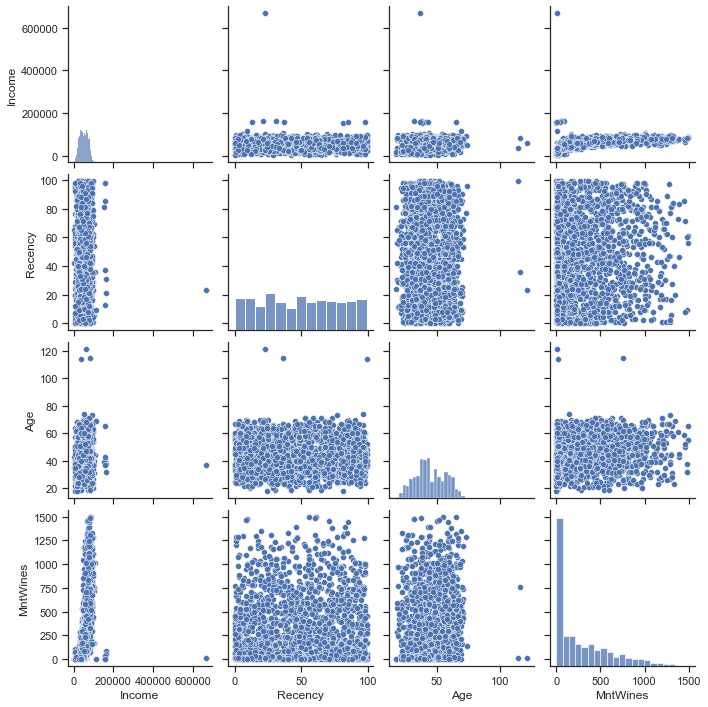

In [45]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=["Income", "Recency", "Age", 'MntWines']) #, hue="Cluster")
plt.show()

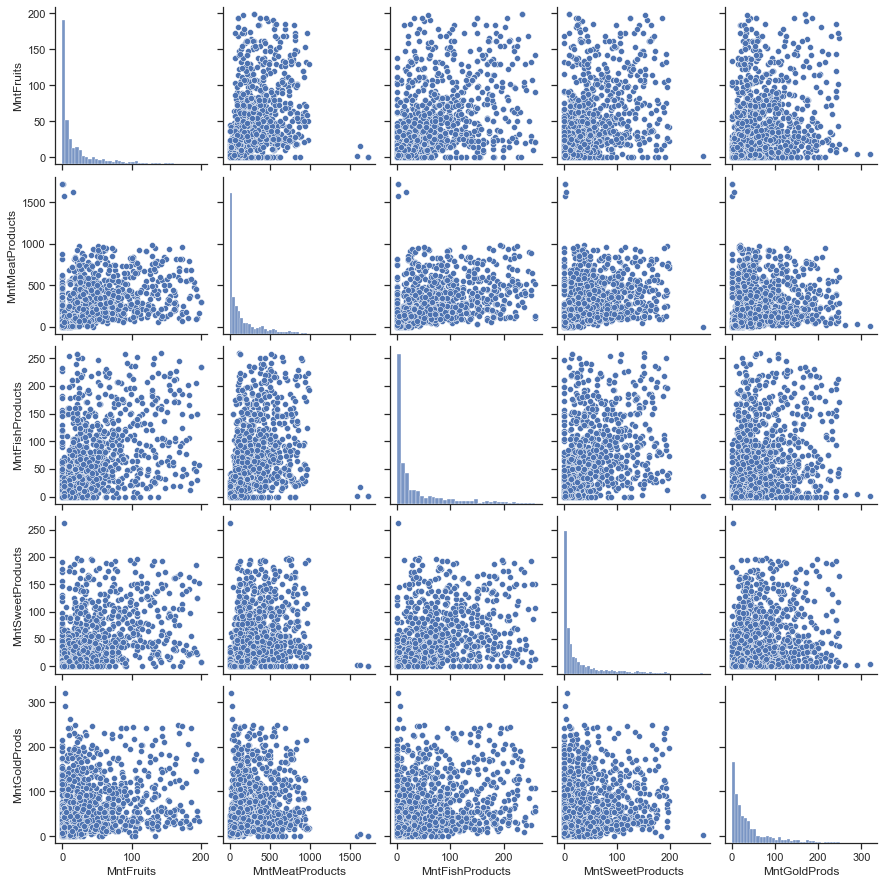

In [46]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'])
plt.show()

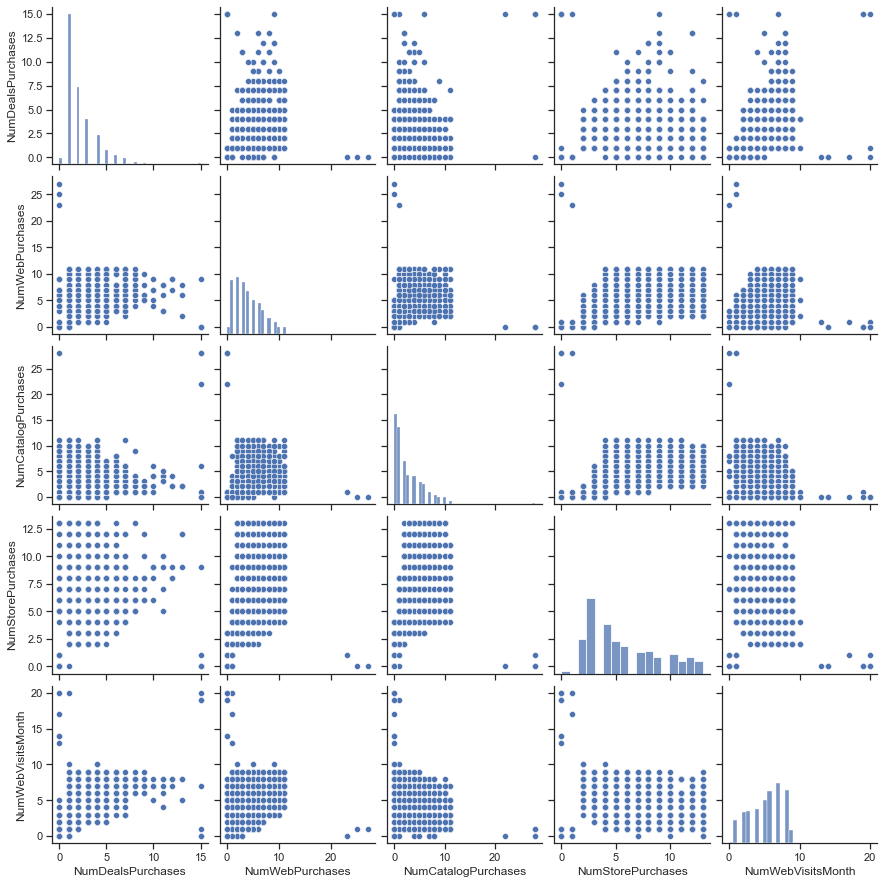

We will remove certain outliers that are prone to distort our results


In [47]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_s, vars=['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'])
plt.show()
print('We will remove certain outliers that are prone to distort our results')

##Removing Outliers
#As indentified from the graphs above, we will adjust the data accordingly. This will remove the outliers.

#Ages greater than 100
#Income greater than 60,000
#MntMeatProducts greater than 1500
MntSweetProducts greater than 250
NumWebPurchases greater than 20
NumCatalogPurchases greater than 20

In [48]:
data_s = data2
data_s = data_s[data_s['Age'] < 100]
data_s = data_s[data_s['Income'] < 60000]
data_s = data_s[data_s['MntMeatProducts'] < 1500]
data_s = data_s[data_s['MntSweetProducts'] < 250]
data_s = data_s[data_s['MntGoldProds'] < 300]
data_s = data_s[data_s['NumWebPurchases'] < 20]
data_s = data_s[data_s['NumCatalogPurchases'] < 20]

In [49]:
data_s = data_s.reset_index(drop=True)

In [50]:
data_s['Kids'] = data_s['Kidhome'] + data_s['Teenhome']

Summed Total Spending and Purchases (for Cumulative Analysis)
Initally we will consider reviewing the results from a wider scope: taking cumulative spending and purchase values.
To understand the customers behaviour and demographics, we will initially analyse cumulative rates only.
Analysis of sale and purchase of each product will be conducted on later stage.
Initally we will consider reviewing the results from a wider scope: taking cumulative spending and purchase values

In [52]:
data_s['Total Spending'] = (data_s['MntWines'] + data_s['MntFruits'] + 
                             data_s['MntMeatProducts'] + data_s['MntFishProducts'] + 
                             data_s['MntSweetProducts'] + data_s['MntGoldProds'])

In [53]:
data_s['Total Purchases'] = (data_s['NumDealsPurchases'] + data_s['NumWebPurchases'] + 
                             data_s['NumCatalogPurchases'] + data_s['NumStorePurchases'] + 
                             data_s['NumWebVisitsMonth'])

In [54]:
data_s = data_s.drop(['Kidhome', 'Teenhome', 'ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [55]:
data_tp = data_s.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'], axis=1)

Analysis from a Wider Prespective (Considering Total Spending and Total Purchases)
Standardising the Features
Since standardising categorical values are avoided, will extract other columns and standardise them for KMeans analysis.

In [56]:
data_tp.columns.values

array(['Education', 'Marital_Status', 'Income', 'Recency', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Kids', 'Total Spending',
       'Total Purchases'], dtype=object)

In [57]:
columns_tp = ['Income', 'Recency', 
              'Total Spending', 'Total Purchases']

In [58]:
data_tbs = data_tp[columns_tp]

#scaling the data 

In [59]:
x_scaled_tbs = preprocessing.scale(data_tbs)
x_scaled_tbs

array([[ 1.52718002,  0.31214897,  4.85806776,  2.10397331],
       [ 0.6155132 , -0.38445323, -0.73596908, -0.97618709],
       [-0.90712653, -0.80241455, -0.64449427, -0.53616417],
       ...,
       [-0.30612522,  1.1132415 , -0.7254143 , -0.97618709],
       [ 1.43774484,  1.4615426 ,  3.53520119,  1.07725318],
       [ 1.11989051, -0.31479301, -0.22582107,  0.05053304]])

C:\Users\vsman\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "


From the graph we shall consider 4 clusters optimal number, as we try to minimize the WCSS values without losing interpetation meaning


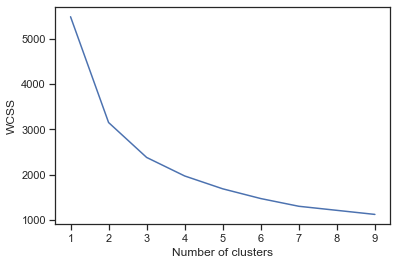

In [60]:
# Createa an empty list
wcss =[]

for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled_tbs)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print('From the graph we shall consider 4 clusters optimal number, as we try to minimize the WCSS values without losing interpetation meaning')

In [61]:
kmeans_scaled_tbs = KMeans(4)
# fit the data
kmeans_scaled_tbs.fit(x_scaled_tbs)

KMeans(n_clusters=4)

In [62]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters_tbss = kmeans_scaled_tbs.fit_predict(x_scaled_tbs)
# Check the result
identified_clusters_tbss

array([3, 1, 2, ..., 0, 3, 1])

In [63]:
data_tbss_clusters = data_tp.copy()
# Create a new Series, containing the identified cluster for each observation
data_tbss_clusters['Cluster'] = identified_clusters_tbss
# Check the result
data_tbss_clusters.head(2)

,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Total Spending,Total Purchases,Cluster
0,1,0,58138.0,58,0,0,0,0,0,0,1,57,0,1617,32,3
1,1,0,46344.0,38,0,0,0,0,0,0,0,60,2,27,11,1


Model Evaluation
Clusters Count
This plot shows the sum of each cluster (0 - 3), this gives us a brief idea of how diverse and quantified are the segments.


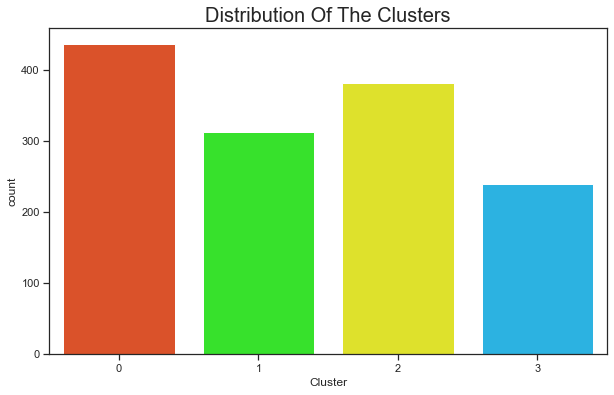

In [64]:
plt.figure(figsize=(10,6))
Cl = sb.countplot(x = 'Cluster', data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
Cl.set_title("Distribution Of The Clusters", size = 20)
plt.show()

<Figure size 432x288 with 0 Axes>

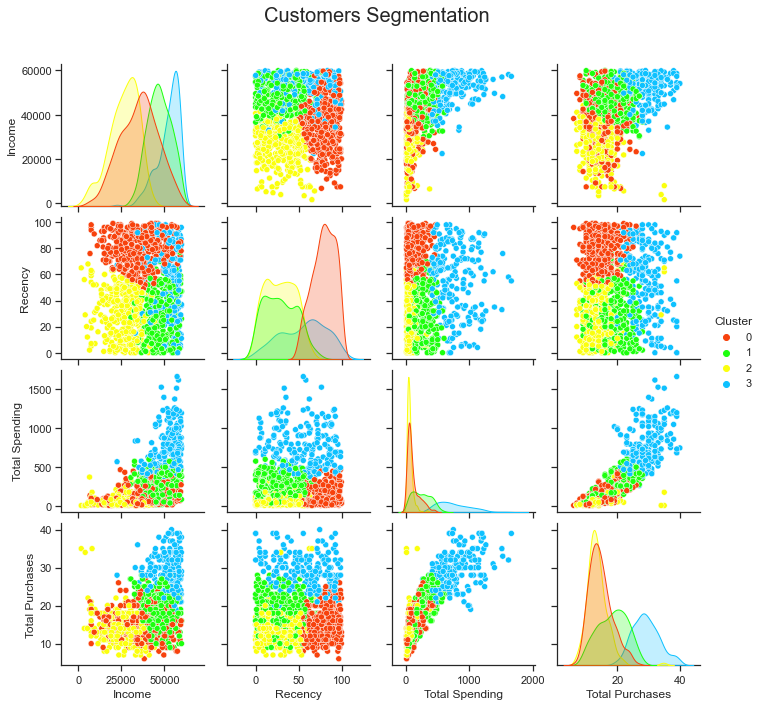

In [65]:
Features = ['Income', 'Recency', 'Total Spending', 'Total Purchases', 'Cluster']
plt.figure()
sb.pairplot(data_tbss_clusters[Features], hue = "Cluster", palette=['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Customers Segmentation', size = 20)
plt.show()

Customer Segments
Based on Income, Spending, Purchases and Recency, the clusters can be categorised as:

0: High Income, High Spending, High Purchases and High Recency
1: Low Income, Low Spending, Low Purchases and Low Recency
2: Average Income, Low Spending, Low Purchases and High Recency
3: High Income, Average Spending, Average Purchases and Low Recency


In [66]:
data_cs = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data_cs)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal


These are the customers segments identified from the analysis above.

Clusters Distribution Along the Features
The notion behind this plot is that its provides an overview of how diverse is our segmentation based on the features.
This barchart shows the percentage of all the clusters in each feature.

In [67]:
grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'Marital_Status': 'sum', 'Age': 'sum', 'Kids': 'sum',
                                                        'Education': 'sum', 'Recency': 'sum',
                                                        'Income': 'sum','Total Spending':'sum', 'Total Purchases':'sum'}))
grouped

,Marital_Status,Age,Kids,Education,Recency,Income,Total Spending,Total Purchases
Cluster,,,,,,,,
0,288,18959,554,513,34254,15387382.0,46085,6352
1,200,14674,407,436,8985,14669715.0,76170,5761
2,249,15228,417,421,10786,10065084.0,22101,5130
3,152,11379,260,323,13157,12460150.0,179218,6945


In [68]:
percents_df = grouped.apply(lambda x: round((x/x.sum()*100),2))
percents_df

,Marital_Status,Age,Kids,Education,Recency,Income,Total Spending,Total Purchases
Cluster,,,,,,,,
0,32.40,31.47,33.82,30.30,50.99,29.26,14.24,26.26
1,22.50,24.36,24.85,25.75,13.37,27.90,23.54,23.82
2,28.01,25.28,25.46,24.87,16.05,19.14,6.83,21.21
3,17.10,18.89,15.87,19.08,19.58,23.70,55.39,28.71


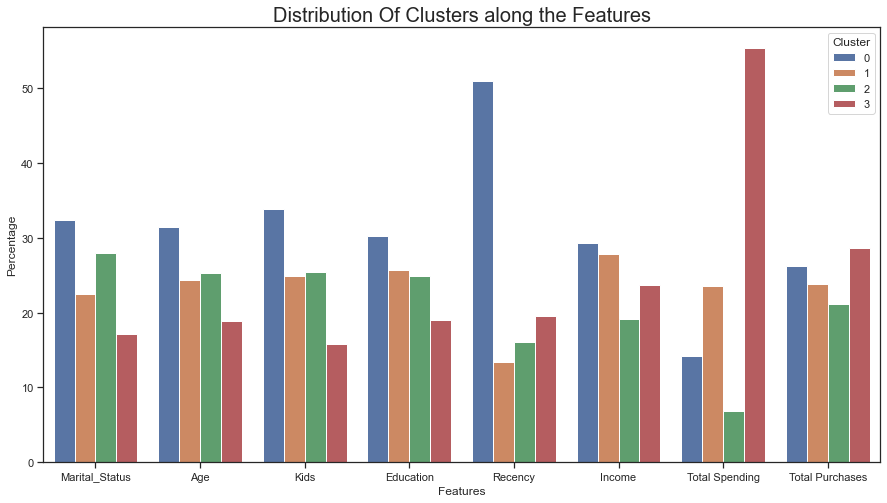

In [70]:
plt.figure(figsize=(15,8))
s = sns.barplot(x = 'Features', y = 'Percentage', hue = 'Cluster',
            data = percents_df.stack().reset_index().rename(columns = {'level_1':'Features', 0: 'Percentage'}))
plt.title("Distribution Of Clusters along the Features", size=20)
plt.show()

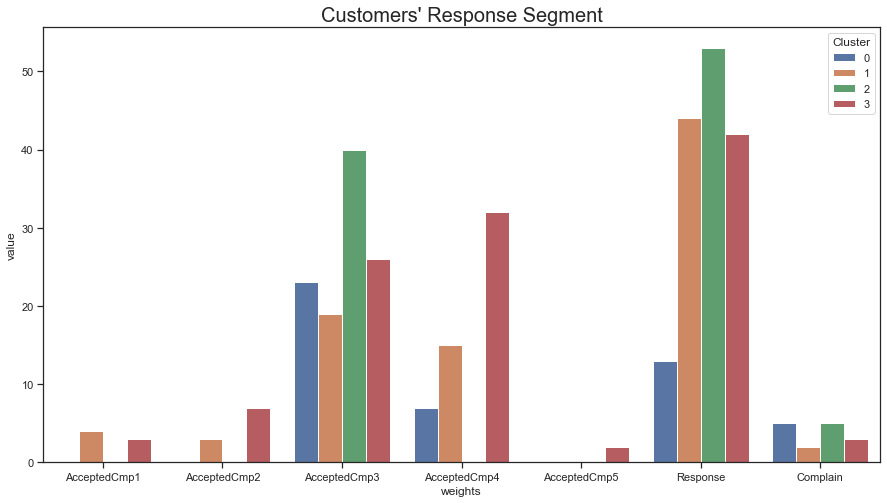

In [72]:
plt.figure(figsize=(15,8))

grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                                                        'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                                                        'AcceptedCmp5': 'sum', 'Response': 'sum', 'Complain': 'sum'})
           .stack().reset_index().rename(columns = {'level_1':'weights', 0: 'value'}))

h = sns.barplot(x = 'weights', y = 'value', hue = 'Cluster', data = grouped)
plt.title("Customers' Response Segment", size=20)
plt.show()

##Results

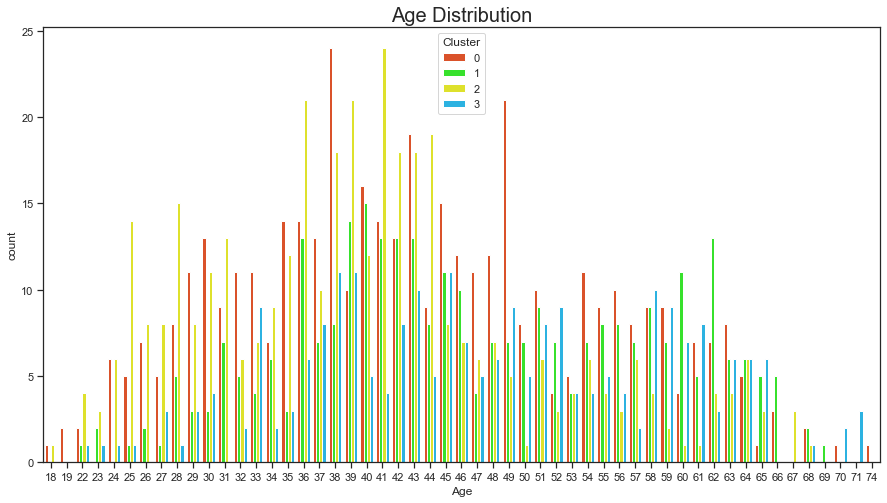

In [73]:
plt.figure(figsize=(15,8))
pl = sns.countplot(x = 'Age', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
plt.title("Age Distribution", size=20)
plt.show()

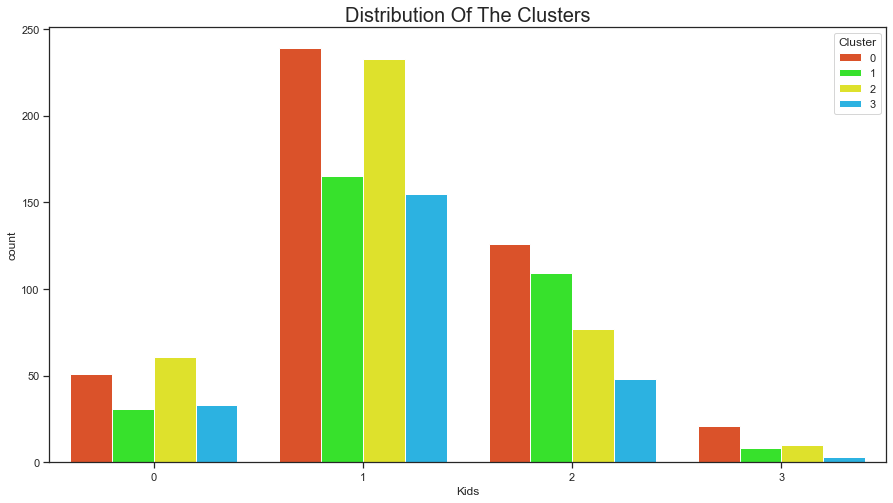

In [75]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Kids', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#F7420D', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
plt.title("Distribution Of The Clusters", size=20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income'>

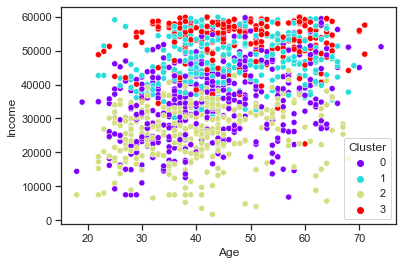

In [76]:
sns.scatterplot(data = data_tbss_clusters, x = 'Age', y = 'Income', hue='Cluster', palette='rainbow') 

Text(0.5, 0.98, 'Customer Demographics')

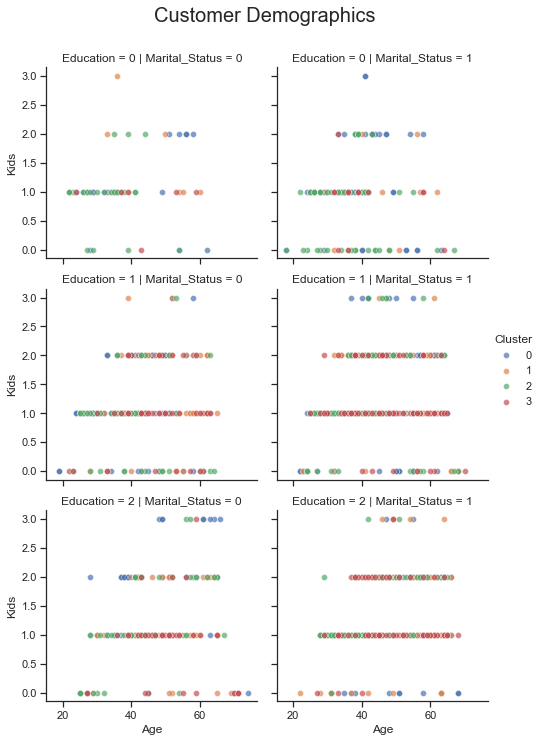

In [77]:
g = sns.FacetGrid(data_tbss_clusters, col="Marital_Status", row="Education", hue="Cluster", height = 3.5, aspect= 1)
g.map(sns.scatterplot, "Age", "Kids", alpha=.7)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Customer Demographics', size=20)

# Findings

In [78]:
data_cs = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data_cs)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal


Demographics
Need-Based customers dominate the age groups between 20 - 45.
All the customer segments are dominated by individuals with kids.
Loyal customers have atleast a graduate degree and have high income.
Campaign Reponse
Majority of the customers regardless of segment accepted the offer after 5th Campaign.
From the ones who accepted the offer in first campaign, Loyal customers were the highest, while impulsive customers on second.
Response to campaign acceptance was signficant 3rd campaign, and 'Need-Based customers' were highest among them. The reason behind this would be because of frequent visits by the Need-Based customers and products offered through the campaign may align with their demands.
Complain were highest from Need-Based and Wandering customers, which may correlate with their income status, and in their lack of interest in first two campaigns.
more interperations coming soon.

Recommendations
Address the complains of Need-Based and Wandering Customers.
Impulsive customer can be converted into Loyal customers, through address their demands.